<div style="font-family: 'Open Sans'; font-size: 36px; color: #006400; font-weight: bold; text-align: center; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='#006400'">
    NextGen Learners Machine Learning Week-2 Assignment
  </span>
</div>


****Name: Mudasir (NextGen Intern)****

****Date: 8th July, 2025****

****Assignment submitted on: nextgenlearners.official@gmail.com****

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Task-1: Customer Segmentation using K-Means Clustering
  </span>
</div>


In this task, The Mall Customers Dataset contains information such as CustomerID, Age, Annual Income (k$), and Spending Score (1–100). The first step is to load the dataset and check for any missing values or incorrect data types to ensure the data is clean and ready for analysis.

Next, perform Exploratory Data Analysis (EDA) using visualization libraries like seaborn or matplotlib. This includes plotting distributions of features such as age, income, and spending score to understand the data patterns.

After EDA, apply K-Means Clustering using relevant features, typically Annual Income and Spending Score. Use the Elbow Method to determine the optimal number of clusters (k) by plotting the within-cluster sum of squares (WCSS) against different values of k. Finally, visualize the resulting clusters with a 2D scatter plot to see how customers are grouped. This helps in identifying customer segments based on spending behavior and income, which is useful in marketing and business strategy.

In [14]:
# Import required libraries and load the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # to use K-Means Clustering

df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
# Check for missing values and data types

print("Missing Values:\n", df.isnull().sum())  # No missing values
print("\nData Types:\n", df.dtypes)

Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Types:
 CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


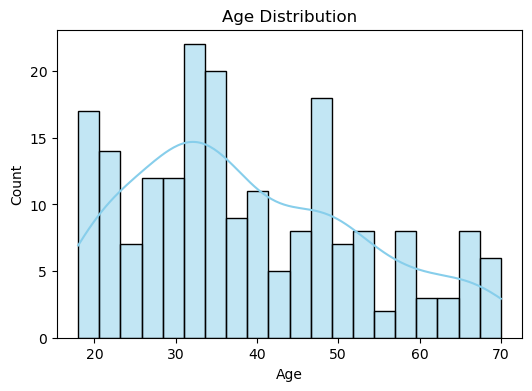

In [16]:
# Applying EDA -> Data Visualization

# 1) Plot distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

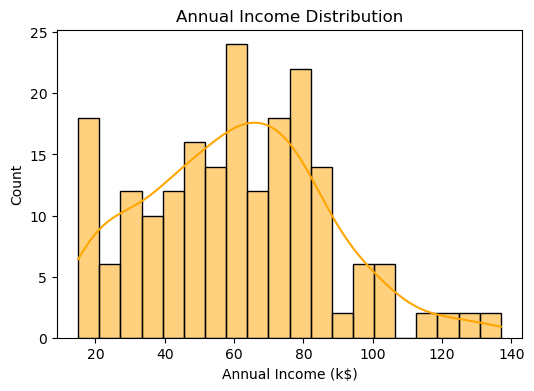

In [17]:
# 2) Plot distribution of Annual Income
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.show()

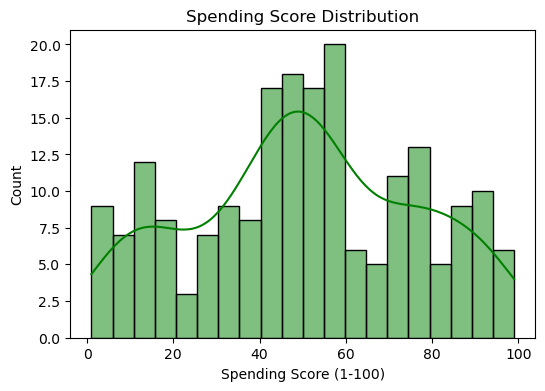

In [18]:
# 3) Plot distribution of Spending Score
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.show()

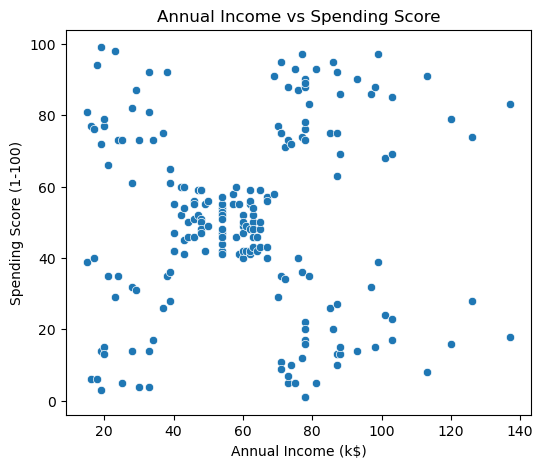

In [19]:
# 4) Scatter plot between Income and Spending Score
plt.figure(figsize=(6,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()

D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

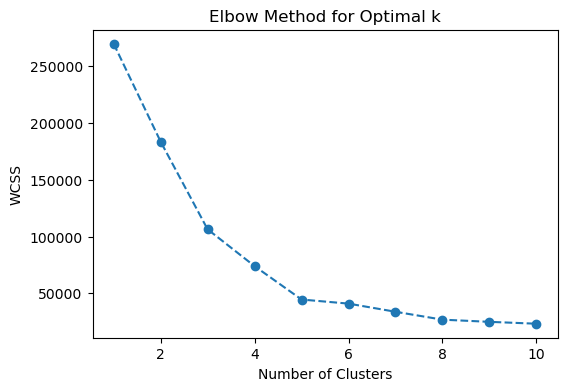

In [20]:
# Applying K-Means Clustering

# Use only Income and Spending Score for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method to Find Optimal Clusters 
wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot WCSS to visualize the Elbow Point
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


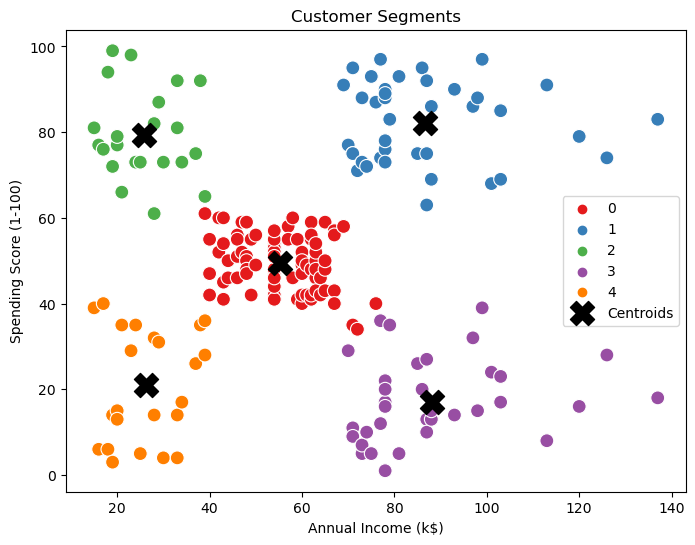

In [21]:
# Apply KMeans with Optimal k (let's decide k=5 based on elbow)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Final Cluster Visualization 
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Task-2:   Movie Recommendation system 
  </span>
</div>

In this task, you will use unsupervised learning to perform movie clustering based on user ratings and genres. Your goal is to group similar movies together so they can be recommended to users with matching preferences. Download a movie dataset such as the MovieLens 100k dataset (or a similar one from Kaggle). Use features like average rating, number of ratings, and one-hot encoded genres. After preparing the data, apply K-Means clustering or Hierarchical Clustering to group movies into meaningful clusters. Visualize the clusters using PCA or a 2D plot and try to interpret what makes each group similar (e.g., all romantic comedies, high-rated thrillers, etc.). This task will help you understand how unsupervised learning can be applied in building movie recommendation systems, a widely used application in platforms like Netflix or IMDb

In [22]:
# Import Libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

ratings = pd.read_csv("ratings.csv") 
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [23]:
movies = pd.read_csv('movies.csv') # contains title and genres
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [24]:
# Merge ratings with movie titles & genres
data = pd.merge(ratings, movies, on='movieId')
data

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
20000258,138301,121017,3.5,1420558479,The Gentleman from Epsom (1962),Comedy|Crime
20000259,138301,121019,4.5,1420558606,The Great Spy Chase (1964),Action|Comedy|Thriller
20000260,138301,121021,4.5,1420558687,Taxi for Tobruk (1961),Drama|War
20000261,138406,110167,4.5,1396184127,"Judge and the Assassin, The (Juge et l'assassi...",Crime|Drama


In [25]:
# Calculate Movie-Level Statistics 
movie_stats = data.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Merge with movie titles and genres
movie_data = pd.merge(movie_stats, movies, on='movieId')

In [26]:
# Remove movies with no genres listed
movie_data = movie_data[movie_data['genres'] != '(no genres listed)']

In [27]:
# One-Hot Encode Genres 
genre_dummies = movie_data['genres'].str.get_dummies(sep='|')
movie_data = pd.concat([movie_data, genre_dummies], axis=1)

# Selected Features 
features = movie_data[['avg_rating', 'rating_count'] + list(genre_dummies.columns)]

# Standardize the feature values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [28]:
# Applying K-Means Clustering 

# You can change n_clusters to a value like 6 or use Elbow method to tune
kmeans = KMeans(n_clusters=6, random_state=42)
movie_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
movie_data['PCA1'] = pca_result[:, 0]
movie_data['PCA2'] = pca_result[:, 1]

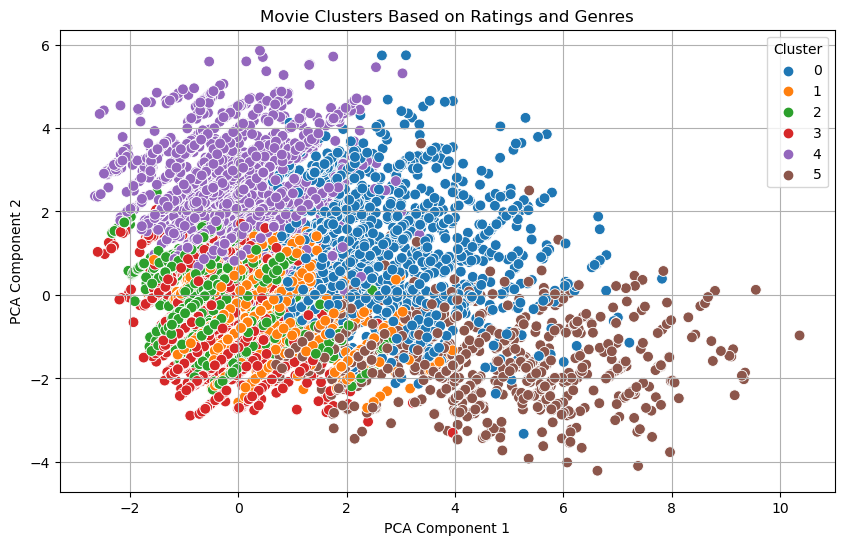

In [29]:
# Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_data, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=60)
plt.title('Movie Clusters Based on Ratings and Genres')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [30]:
# Sample Movies from Each Cluster
for i in sorted(movie_data['Cluster'].unique()):
    print(f"\n Sample Movies from Cluster {i}:")
    print(movie_data[movie_data['Cluster'] == i]['title'].sample(5, random_state=1).values)


 Sample Movies from Cluster 0:
['Blade Runner (1982)'
 "Zatoichi's Cane Sword (Zatôichi tekka tabi) (Zatôichi 15) (1967)"
 'Hudson Hawk (1991)' 'Mad Max Beyond Thunderdome (1985)'
 'Highlander II: The Quickening (1991)']

 Sample Movies from Cluster 1:
['Nevada Smith (1966)' 'Crossing the Bridge (1992)' 'Tinpis Run (1991)'
 'If I Were You (2012)'
 'Ricky Gervais: Out of England - The Stand-Up Special (2008)']

 Sample Movies from Cluster 2:
['Thief, The (Vor) (1997)' 'Stranded (2001)' 'Exit (2011)'
 'Bill Cunningham New York (2011)' 'Attack, The (2012)']

 Sample Movies from Cluster 3:
["Time Traveler's Wife, The (2009)" 'Entre ses mains (2005)'
 'Blondes at Work (1938)' 'Bride Came C.O.D., The (1941)'
 'Daddy Long Legs (1955)']

 Sample Movies from Cluster 4:
['Typhoon (Tae-poong) (2005)' 'Impulse (1984)' '13 (2010)'
 'Appointment with Death (1988)' 'Presence, The (2010)']

 Sample Movies from Cluster 5:
['Open Season (2006)' "The Gruffalo's Child (2011)"
 'Shipwrecked (a.k.a. Haakon

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Both Tasks Explanation
  </span>
</div>

*****Task1: Mall Customers Clustering*****
In this task, K-Means clustering was applied to segment mall customers based on their annual income and spending score. After performing exploratory analysis, the elbow method was used to determine the optimal number of clusters (k), which showed a sharp bend around k=5. The final 2D scatter plot visualized distinct customer groups, such as high spenders with high income or budget-conscious shoppers. This segmentation helps businesses tailor marketing strategies and improve customer targeting.

*****Task 2: Movie Recommendation via Clustering*****
This task used unsupervised learning to group movies based on average rating, rating count, and genres (one-hot encoded). After preprocessing and standardization, K-Means clustering was performed, and results were visualized using PCA in 2D. The clusters grouped similar movies, such as romantic comedies, thrillers, or high-rated dramas. This visualization revealed content similarity and preference trends, showing how clustering can power content-based recommendations like those used by Netflix or IMDb.